In [1]:
from sklearn.mixture import GaussianMixture
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm; tqdm.pandas()
pd.options.display.max_columns = 202
pd.options.display.max_rows = 300
import seaborn as sns

In [2]:
train = pd.read_pickle('data/train_original.pkl')
test = pd.read_pickle('data/test_original.pkl')
special_cols = [col for col in train.columns if train[col].dtype != np.float64]
feature_cols = [col for col in train.columns if col not in special_cols]

c:\users\khyeh\anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


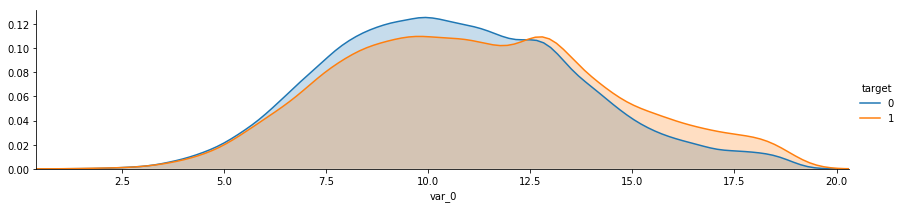

In [3]:
col = feature_cols[0]
a = sns.FacetGrid(train, hue='target', aspect=4)
a.map(sns.kdeplot, col, shade='True')
a.set(xlim=(train[col].min(), train[col].max()))
#a.set_titles()
a.add_legend()
plt.show()

c:\users\khyeh\anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


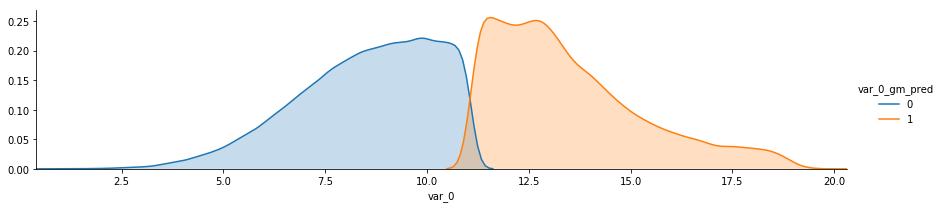

In [4]:
gm = GaussianMixture(n_components=2)
train[col+'_gm_pred'] = gm.fit_predict(train[[col]])

a = sns.FacetGrid(train, hue=col+'_gm_pred', aspect=4)
a.map(sns.kdeplot, col, shade='True')
a.set(xlim=(train[col].min(), train[col].max()))
#a.set_titles()
a.add_legend()
plt.show()

In [11]:
train[[col+'_gm_pred', 'target']].corr('spearman')

,var_0_gm_pred,target
var_0_gm_pred,1.00000,0.03876
target,0.03876,1.00000


c:\users\khyeh\anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


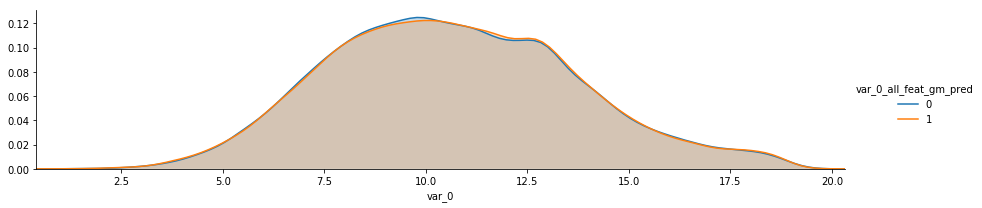

In [9]:
gm = GaussianMixture(n_components=2)
train[col+'_all_feat_gm_pred'] = gm.fit_predict(train[feature_cols])

a = sns.FacetGrid(train, hue=col+'_all_feat_gm_pred', aspect=4)
a.map(sns.kdeplot, col, shade='True')
a.set(xlim=(train[col].min(), train[col].max()))
#a.set_titles()
a.add_legend()
plt.show()

In [10]:
train[[col+'_all_feat_gm_pred', 'target']].corr('spearman')

,var_0_all_feat_gm_pred,target
var_0_all_feat_gm_pred,1.00000,0.01575
target,0.01575,1.00000


c:\users\khyeh\anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


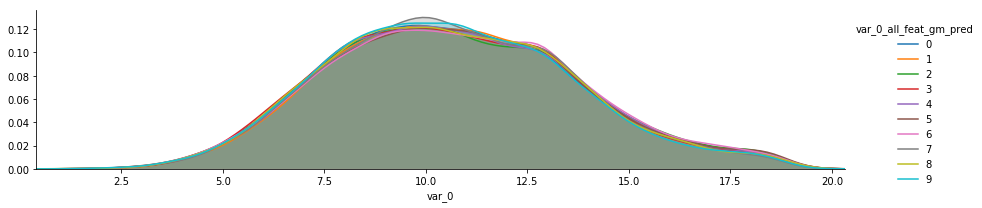

In [7]:
gm = GaussianMixture(n_components=10)
train[col+'_all_feat_gm_pred'] = gm.fit_predict(train[feature_cols])

a = sns.FacetGrid(train, hue=col+'_all_feat_gm_pred', aspect=4)
a.map(sns.kdeplot, col, shade='True')
a.set(xlim=(train[col].min(), train[col].max()))
#a.set_titles()
a.add_legend()
plt.show()

In [8]:
train[[col+'_all_feat_gm_pred', 'target']].corr('spearman')

,var_0_all_feat_gm_pred,target
var_0_all_feat_gm_pred,1.000000,-0.003694
target,-0.003694,1.000000
